In [2]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Data Analysis¶

In [3]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly as pt

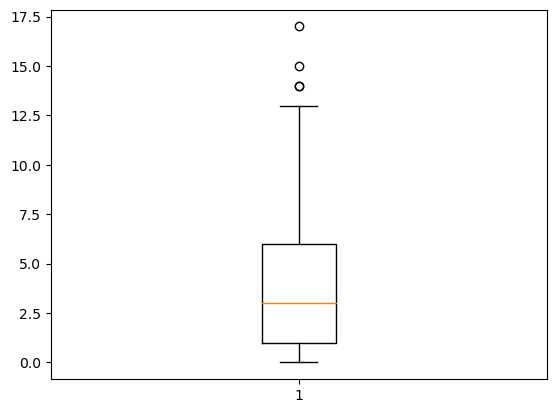

In [10]:
plt.boxplot(df["Pregnancies"])
plt.show()

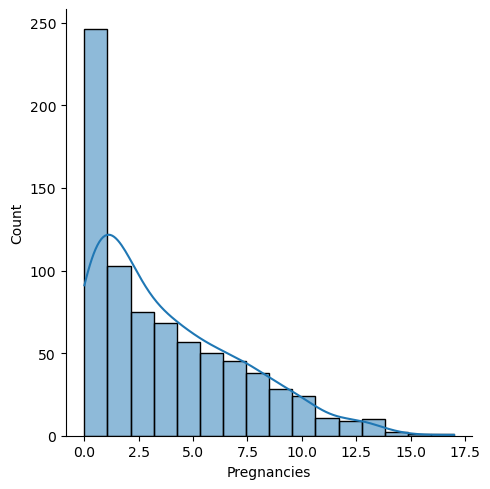

In [11]:
sns.displot(df["Pregnancies"],kde=True)
plt.show()

insight :
As we see   Data have outliers we have to treat Them for better accuracy results

In [12]:
#treating Outliers 
q1=df["Pregnancies"].quantile(0.25)
q2=df["Pregnancies"].quantile(0.5)
q3=df["Pregnancies"].quantile(0.75)
IQR=q3-q1
u_l=q3+(1.5*IQR)
l_l=q1-(1.5*IQR)
df[(df["Pregnancies"]>u_l) | (df["Pregnancies"]<l_l)]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [13]:
df["Pregnancies"]=df["Pregnancies"].clip(lower=l_l,upper=u_l)

In [14]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35,0,33.6,0.627,50,1
1,1.0,85,66,29,0,26.6,0.351,31,0
2,8.0,183,64,0,0,23.3,0.672,32,1
3,1.0,89,66,23,94,28.1,0.167,21,0
4,0.0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101,76,48,180,32.9,0.171,63,0
764,2.0,122,70,27,0,36.8,0.340,27,0
765,5.0,121,72,23,112,26.2,0.245,30,0
766,1.0,126,60,0,0,30.1,0.349,47,1


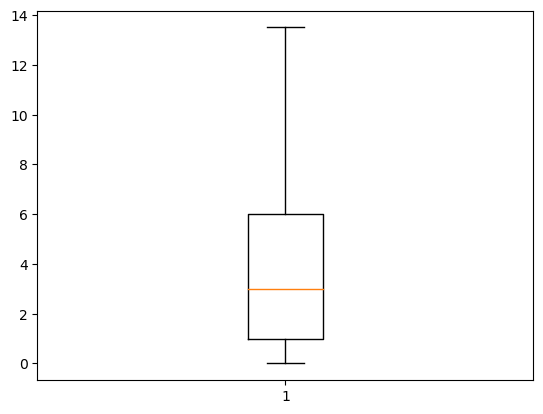

In [15]:
plt.boxplot(df["Pregnancies"])
plt.show()

In [16]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

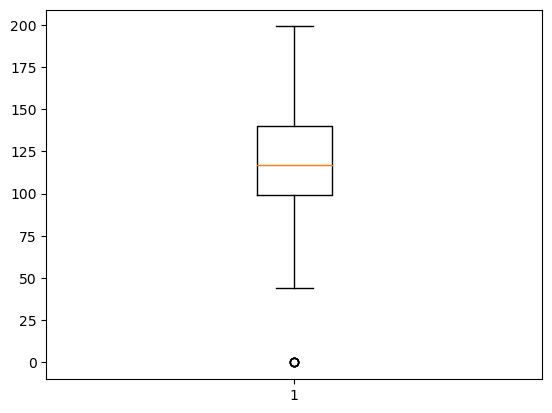

In [17]:
plt.boxplot(df["Glucose"])
plt.show()

In [18]:
q1=df["Glucose"].quantile(0.25)
q2=df["Glucose"].quantile(0.5)
q3=df["Glucose"].quantile(0.75)
IQR=q3-q1
ul=q3+(1.5*IQR)
ll=q1-(1.5*IQR)
len(df[(df["Glucose"]>ul) | (df["Glucose"]<ll)]) 


5

In [19]:
df["Glucose"]=df["Glucose"].clip(upper=ul,lower=ll)

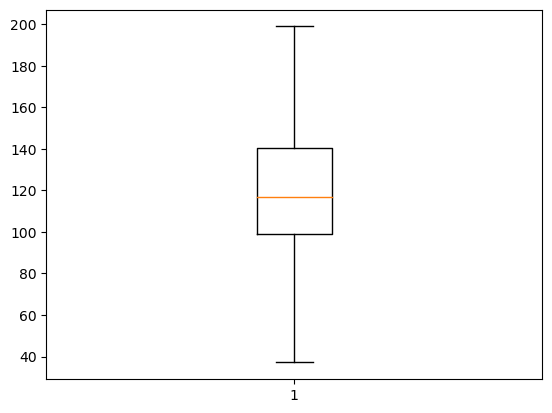

In [20]:
plt.boxplot(df["Glucose"])
plt.show()

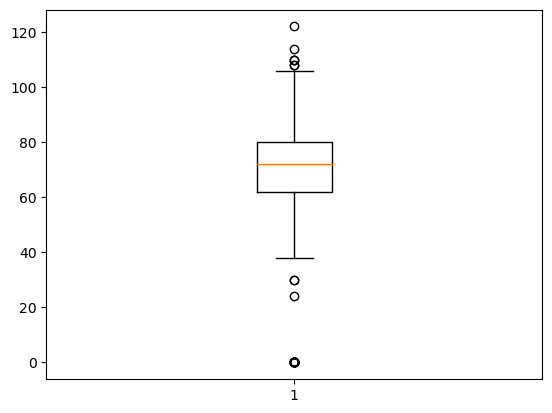

In [21]:
plt.boxplot(df["BloodPressure"])
plt.show()

In [22]:
q1=df["BloodPressure"].quantile(0.25)
q2=df["BloodPressure"].quantile(0.5)
q3=df["BloodPressure"].quantile(0.75)
IQR=q3-q1
ul=q3+(1.5*IQR)
ll=q1-(1.5*IQR)
len(df[(df["BloodPressure"]>ul) | (df["BloodPressure"]<ll)]) 


45

In [23]:
df["BloodPressure"]=df["BloodPressure"].clip(lower=ll,upper=ul)

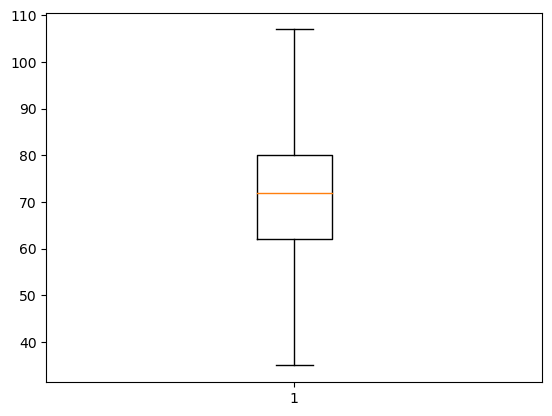

In [24]:
plt.boxplot(df["BloodPressure"])
plt.show()

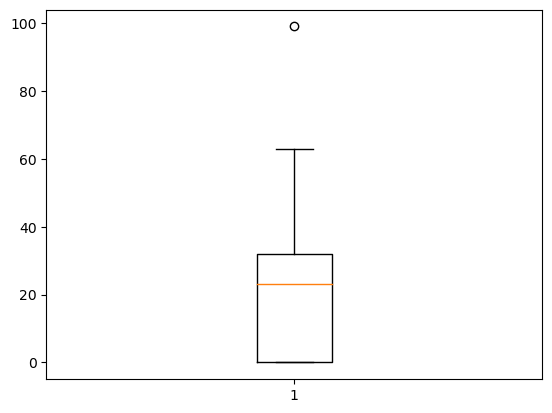

In [25]:
plt.boxplot(df["SkinThickness"])
plt.show()

In [26]:
q1=df["SkinThickness"].quantile(0.25)
q2=df["SkinThickness"].quantile(0.5)
q3=df["SkinThickness"].quantile(0.75)
IQR=q3-q1
ul=q3+(1.5*IQR)
ll=q1-(1.5*IQR)
df[(df["SkinThickness"]>ul) | (df["SkinThickness"]>ll)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35,0,33.6,0.627,50,1
1,1.0,85.0,66,29,0,26.6,0.351,31,0
2,8.0,183.0,64,0,0,23.3,0.672,32,1
3,1.0,89.0,66,23,94,28.1,0.167,21,0
4,0.0,137.0,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76,48,180,32.9,0.171,63,0
764,2.0,122.0,70,27,0,36.8,0.340,27,0
765,5.0,121.0,72,23,112,26.2,0.245,30,0
766,1.0,126.0,60,0,0,30.1,0.349,47,1


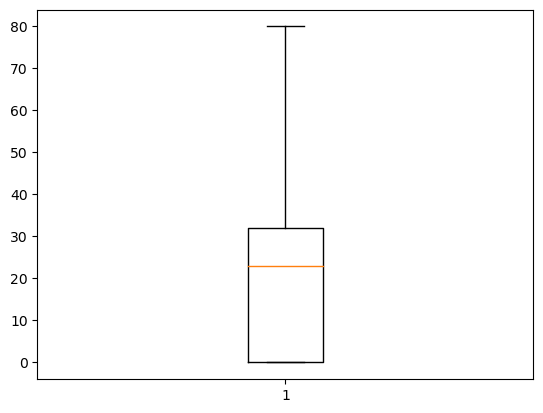

In [27]:
df["SkinThickness"]=df["SkinThickness"].clip(upper=ul,lower=ll)
plt.boxplot(df["SkinThickness"])
plt.show()

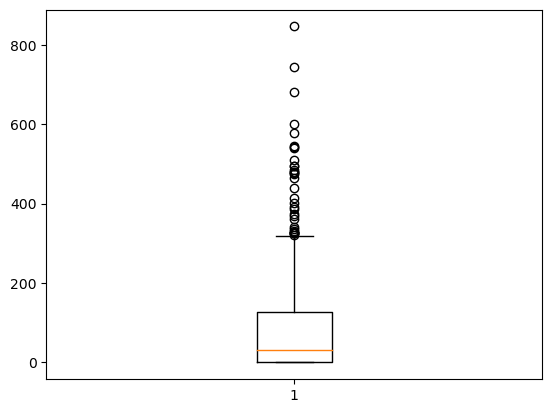

In [28]:
plt.boxplot(df["Insulin"])
plt.show()

In [29]:
q1=df["Insulin"].quantile(0.25)
q2=df["Insulin"].quantile(0.5)
q3=df["Insulin"].quantile(0.75)
IQR=q3-q1
ul=q3+(1.5*IQR)
ll=q1-(1.5*IQR)
df[(df["Insulin"]>ul) | (df["Insulin"]>ll)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35,0,33.6,0.627,50,1
1,1.0,85.0,66,29,0,26.6,0.351,31,0
2,8.0,183.0,64,0,0,23.3,0.672,32,1
3,1.0,89.0,66,23,94,28.1,0.167,21,0
4,0.0,137.0,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76,48,180,32.9,0.171,63,0
764,2.0,122.0,70,27,0,36.8,0.340,27,0
765,5.0,121.0,72,23,112,26.2,0.245,30,0
766,1.0,126.0,60,0,0,30.1,0.349,47,1


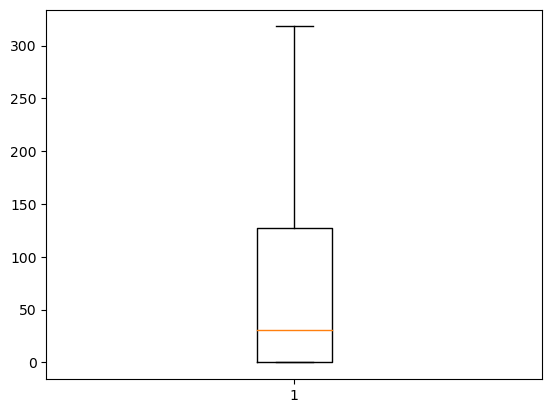

In [30]:
df["Insulin"]=df["Insulin"].clip(upper=ul,lower=ll)
plt.boxplot(df["Insulin"])
plt.show()

In [31]:
df["Outcome"].unique()

array([1, 0], dtype=int64)

In [32]:

# dropping column Test_date and Outcome variable(Corona) column , and storing it to X
X=df.iloc[:,:-1]

# storing outcome variable in y
y=df.iloc[:,-1]
X


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72,35,0.0,33.6,0.627,50
1,1.0,85.0,66,29,0.0,26.6,0.351,31
2,8.0,183.0,64,0,0.0,23.3,0.672,32
3,1.0,89.0,66,23,94.0,28.1,0.167,21
4,0.0,137.0,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76,48,180.0,32.9,0.171,63
764,2.0,122.0,70,27,0.0,36.8,0.340,27
765,5.0,121.0,72,23,112.0,26.2,0.245,30
766,1.0,126.0,60,0,0.0,30.1,0.349,47


In [33]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# splitting data into Training and Test Data 

In [34]:
from sklearn.model_selection  import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size= 0.2,random_state=16)

## standardisation/ Feature Scaling into Dataset 

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)

# Building Models

# Logistic Regression 

In [37]:
#Modeling
from sklearn.linear_model import LogisticRegression 
log_regression=LogisticRegression()
log_regression.fit(X_train,y_train)

LogisticRegression()

In [38]:
#prediction 
log_regression_pred_train=log_regression.predict(X_train)
log_regression_pred=log_regression.predict(X_test)
log_regression_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [39]:
#Evaluation

from sklearn.metrics import accuracy_score
print("train Accuracy Score :",accuracy_score(y_train,log_regression_pred_train)*100)
print("test Accuracy Score :",accuracy_score(y_test,log_regression_pred)*100)
 

train Accuracy Score : 77.36156351791531
test Accuracy Score : 82.46753246753246


In [40]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,log_regression_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       102
           1       0.84      0.60      0.70        52

    accuracy                           0.82       154
   macro avg       0.83      0.77      0.79       154
weighted avg       0.83      0.82      0.82       154



# KNN

In [41]:
#Modeling 
from  sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
y_pred_train=KNN.predict(X_train)
y_pred_test=KNN.predict(X_test)

In [43]:
#evaluation 
from sklearn.metrics import accuracy_score
print("Train Accuracy Score :",accuracy_score(y_train,y_pred_train))

print("Test Accuracy Score :",accuracy_score(y_test,y_pred_test))
from sklearn.model_selection import cross_val_score
print("cross validation score :",cross_val_score(KNN,X,y,cv=5,scoring="accuracy").mean())
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_test))

Train Accuracy Score : 0.8501628664495114
Test Accuracy Score : 0.7857142857142857
cross validation score : 0.7226805873864698
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       102
           1       0.72      0.60      0.65        52

    accuracy                           0.79       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



# USing Hyper Parameter tuning to improve accuracy

# Hyper parameter tuning

In [44]:
from sklearn. model_selection import GridSearchCV

In [48]:
estimator=KNeighborsClassifier()
param_grid={"n_neighbors" :list(range(1,61))}
cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
cv_classifier.fit(X_train,y_train)
cv_classifier.best_params_

{'n_neighbors': 15}

In [49]:
#Modeling 
from  sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=15)
KNN.fit(X_train,y_train)

#prediction
y_pred_train=KNN.predict(X_train)

KN_pred=KNN.predict(X_test)
KN_pred


#evaluation 
from sklearn.metrics import accuracy_score
print("Train Accuracy Score :",accuracy_score(y_train,y_pred_train))

print("Test Accuracy Score :",accuracy_score(y_test,KN_pred))
from sklearn.model_selection import cross_val_score
print("cross validation score :",cross_val_score(KNN,X,y,cv=5,scoring="accuracy").mean())
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_test))

Train Accuracy Score : 0.7687296416938111
Test Accuracy Score : 0.8116883116883117
cross validation score : 0.7344452932688228
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       102
           1       0.72      0.60      0.65        52

    accuracy                           0.79       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



# SVm

In [52]:
#model
from sklearn.svm import SVC
svm_model=SVC() 
svm_model.fit(X_train,y_train)

#prediction
pred_test=svm_model.predict(X_test)
pred_train=svm_model.predict(X_train)
#evaluation 
from sklearn.metrics import accuracy_score
print(" Train Accuracy score :",accuracy_score(y_train,pred_train))

print("Test Accuracy score :",accuracy_score(y_test,pred_test))

from sklearn.model_selection import cross_val_score 
print("cross validation score:",cross_val_score(svm_model,X,y,cv=5,scoring="accuracy").mean())

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_test))


 Train Accuracy score : 0.8224755700325733
Test Accuracy score : 0.8116883116883117
cross validation score: 0.7643578643578642
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       102
           1       0.72      0.60      0.65        52

    accuracy                           0.79       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
classification_report(y_test,pred_test)


# Decision Tree

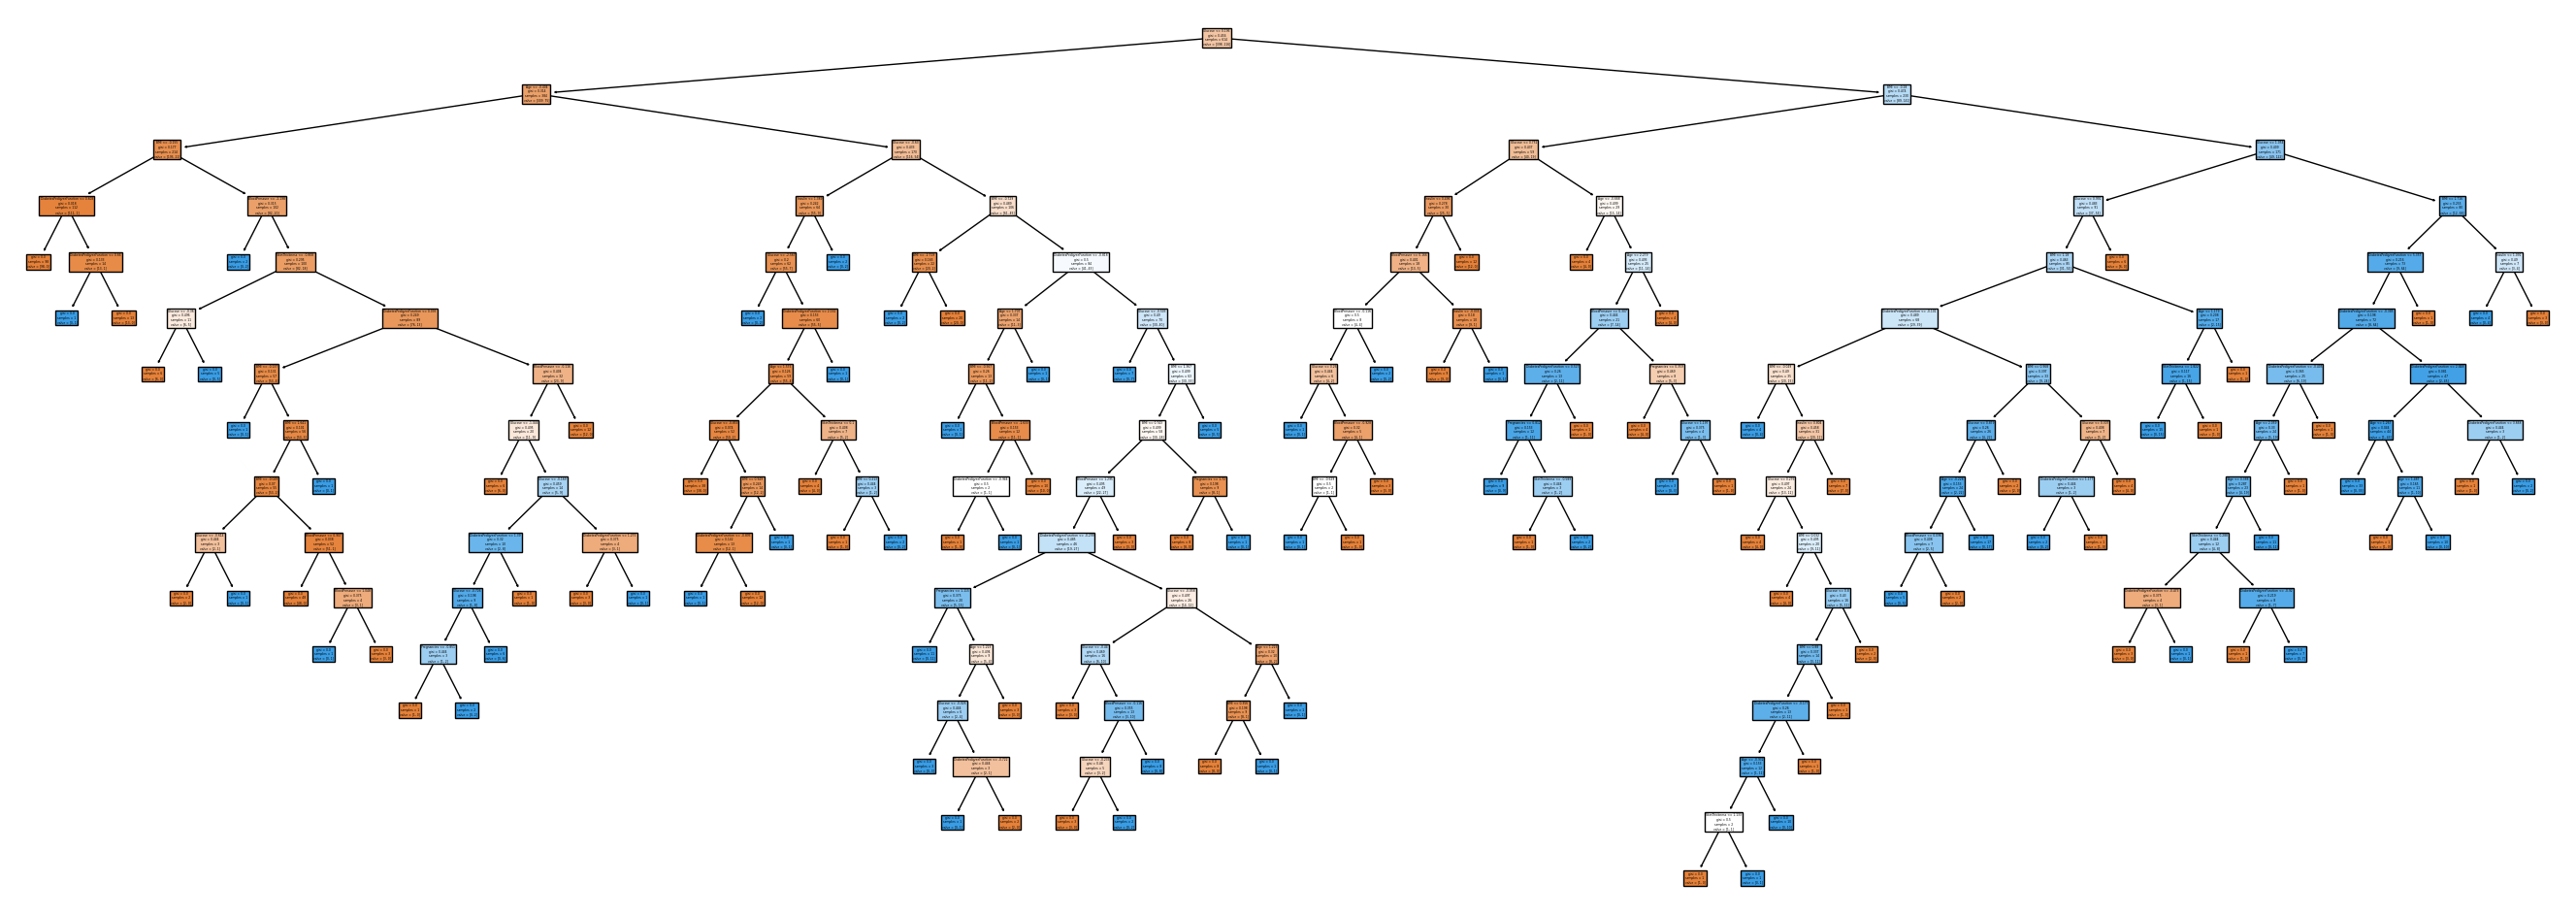

In [54]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
from sklearn.tree import plot_tree 
plt.figure(figsize=(34,12))
plot_tree(model,filled="True",feature_names=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])
plt.show()


In [55]:
#prediction
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)

y_pred_test
y_pred_train

#evaluation
from sklearn.metrics import accuracy_score
print("test accuracy :",accuracy_score(y_test,y_pred_test))
print("train accuracy:",accuracy_score(y_train,y_pred_train))

from sklearn.model_selection import cross_val_score

print("cross valiation score :",cross_val_score(model,X,y,cv=5,scoring="accuracy").mean())


test accuracy : 0.7077922077922078
train accuracy: 1.0
cross valiation score : 0.7123588829471182


In [57]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=16)
rf_model.fit(X_train,y_train)

#prediction
y_pred_train=rf_model.predict(X_train)
y_pred_test=rf_model.predict(X_test)

#evaluation 
from sklearn.metrics import accuracy_score
print("Train accuracy:",accuracy_score(y_train,y_pred_train))
print("Test accuracy :",accuracy_score(y_test,y_pred_test))
from sklearn.model_selection import cross_val_score
print("cross validation score :",cross_val_score(rf_model,X,y,cv=5,scoring="accuracy").mean())
from sklearn.metrics import classification_report,confusion_matrix
classification_report(y_test,y_pred_test)



Train accuracy: 1.0
Test accuracy : 0.7922077922077922
cross validation score : 0.7591630591630592


'              precision    recall  f1-score   support\n\n           0       0.82      0.88      0.85       102\n           1       0.73      0.62      0.67        52\n\n    accuracy                           0.79       154\n   macro avg       0.77      0.75      0.76       154\nweighted avg       0.79      0.79      0.79       154\n'

In [58]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [59]:
 from xgboost import XGBClassifier
xg_model=XGBClassifier()
xg_model.fit(X_train,y_train)

#preoiction
y_pred_train=xg_model.predict(X_train)
y_pred_test=xg_model.predict(X_test)

#evaluation
from sklearn.metrics import accuracy_score
print("train accuracy :",accuracy_score(y_train,y_pred_train))
print("test accuracy :",accuracy_score(y_test,y_pred_test))

from sklearn.model_selection import cross_val_score
print("cross validation score :",cross_val_score(xg_model,X,y,cv=5,scoring="accuracy").mean())



train accuracy : 1.0
test accuracy : 0.7987012987012987
cross validation score : 0.7526440879382056


In [60]:
xg_model.feature_importances_

array([0.09083178, 0.23525776, 0.09608187, 0.09603895, 0.10777867,
       0.15611379, 0.0994845 , 0.11841275], dtype=float32)

# Conclusion :¶
After testing and evaluating the data from different algorithm. I have came to the conclusion that Logistic Regression gives us the best accuracy i.e. 82% and the rest KNN algorithm, Decision Tree algorithm and Random Forest algorithm gives us least accuracy 

 # Predictive Model

In [61]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
unknown=np.array([[1,92,88,35,94,33.6,0.564,34]])

df_new=pd.DataFrame(scaler.transform(unknown),columns=X.columns)

df_new
 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.85131,-0.932277,1.224867,0.882737,0.203715,0.175397,0.287441,0.079935


In [65]:
log_regression.predict(df_new)

array([1], dtype=int64)

In [63]:
unknown=(np.array([[1,109,30,38,83,53.3,0.195,33]]))
df_new=pd.DataFrame(scaler.transform(unknown),columns=X.columns)
df_new


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.85131,-0.391949,-2.868213,1.070649,0.086811,2.633189,-0.833306,-0.008022


In [64]:
print("the prediction for this patient is : ", log_regression.predict(df_new))

the prediction for this patient is :  [1]
